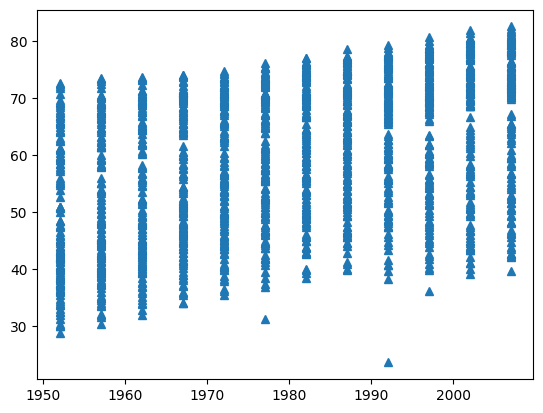

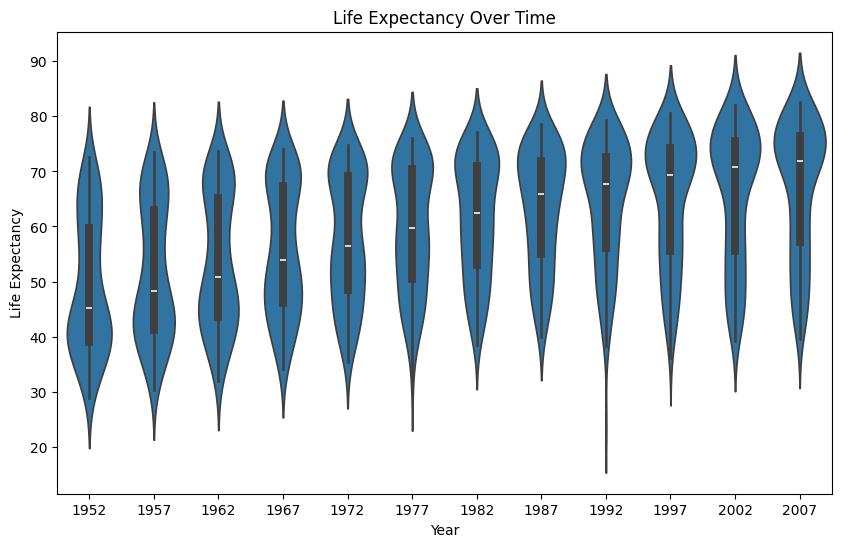

In [87]:
# Project 3
# Joed Quaye
# Ronald Chomnou
# Griffin Araujo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy 

# Load data
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

# **Exercise 1**: *Make a scatter plot of life expectancy across time.*
%matplotlib inline
plt.plot(data['year'], data['lifeExp'], "^")

# Question 1 

# There is a general positive trend (increasing) for life expectancy across time. The trend doesn't seem to be strictly linear, but it's there 

# creating the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='lifeExp', data=data)
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

plt.show()



In [ ]:
# **Question 2**: How would you describe the distribution of life expectancy across countries 
# for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

# During the the earlier years such as years 1952-1982, it is skewed towards the bottom. This means the life expectancy is 
# lower during these years in most countries.

# Question 3

# Based on intuition and basic understanding of the relationship between time (year) and life expectancy, it's reasonable to expect that there would be some level of correlation or relationship between these two variables. Generally, we might anticipate that life expectancy has increased over time due to advancements in healthcare, technology, and overall living conditions.
# Therefore, without conducting the analysis or seeing the specific data, I would intuitively expect that there would likely be enough evidence to reject the null hypothesis of no relationship between year and life expectancy. However, the strength and significance of this relationship would need to be verified through statistical analysis, such as by examining the coefficient and p-value from the linear regression model.

# Question 4

# A violin plot of residuals from the linear model vs. year would likely show residuals centered around zero, indicating that the model adequately 
# captures the relationship between year and life expectancy. However, if there are systematic biases or non-linear patterns in the model's predictions, 
# we might observe deviations from zero across different years in the violin plot.

# Question 5

# In linear regression, the violin plot of residuals should show a symmetrical distribution around zero, consistent spread across predictor values, 
# with no discernible patterns or trends. A model with these characteristics should indicate that it's adequately fitted and meets the assumptions of linear regression.


In [88]:
# Exercise 2

import numpy as np
from sklearn import linear_model
import statsmodels.api as sm


# creating the model 

reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(e2_X, e2_Y)

X = data['year']  # Independent variable (year)
y = data['lifeExp']  # Dependent variable (life expectancy)

X = sm.add_constant(X)

# fitting the linear regression model
model = sm.OLS(y, X).fit()

# getting the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.55e-80
Time:                        18:32:48   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -585.6522     32.314    -18.124      0.0

In [ ]:
# Question 6

# On average, life expectancy increases by about .3259 years every year

# Question 7 (MIGHT NEED TO CHECK THIS)

# The null hypothesis of no relationship between year and life expectancy is indeed rejected because of the p value. 
# With each passing year, life expectancy changes. 

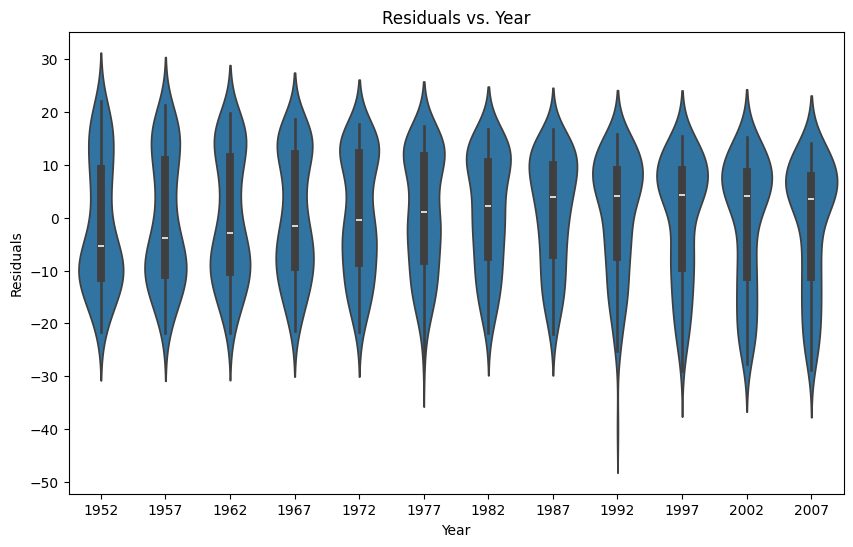

In [101]:
# Exercise 3
import seaborn as sns

# creating the model (using the model from the previous exercise)
X = data['year'].values.reshape(-1, 1) 
y = data['lifeExp'].values  
regfit = reg.fit(X, y)

# Getting the predicted values from the model
predicted_values = regfit.predict(X)

# Calculating residuals
residuals = y - predicted_values

# Adding residuals as a new column to the DataFrame
data['residuals'] = residuals

plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()



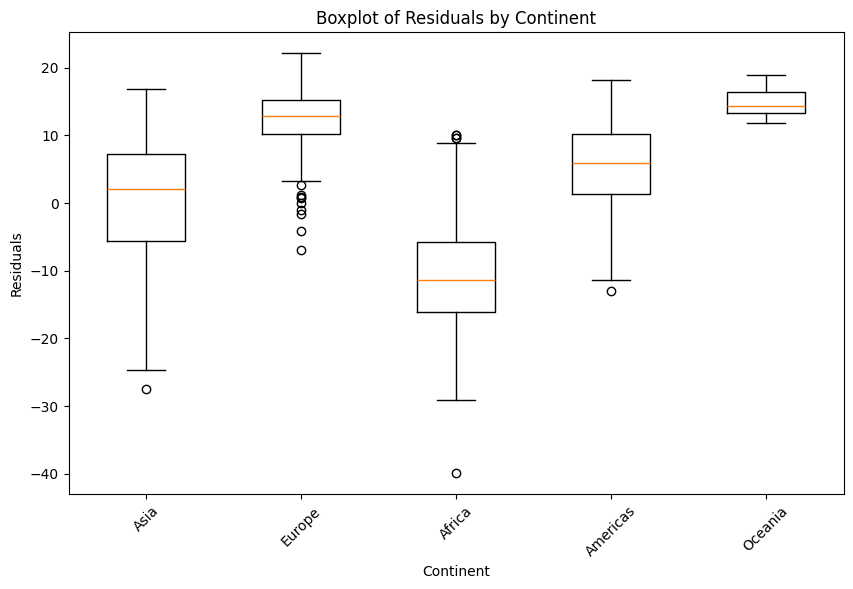

In [102]:
# Exercise 4
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Boxplot of Residuals by Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.boxplot([data[data['continent'] == c]['residual'] for c in data['continent'].unique()], labels=data['continent'].unique())
plt.show()

In [23]:
#Question 9 

# Yes there's a dependence between model residual and continent because the distribution of residuals varies  across different continents.
# This suggests that there could be other effects that impact the time (or other independent variables) on life expectancy differs across continents. 
# It also suggests there may be additional factors specific to each continent that are influencing life expectancy beyond what's captured by 
# the current regression model. So we have to employ more sophisticated modeling techniques to better capture the nuances of the relationship between 
# residual and continent.

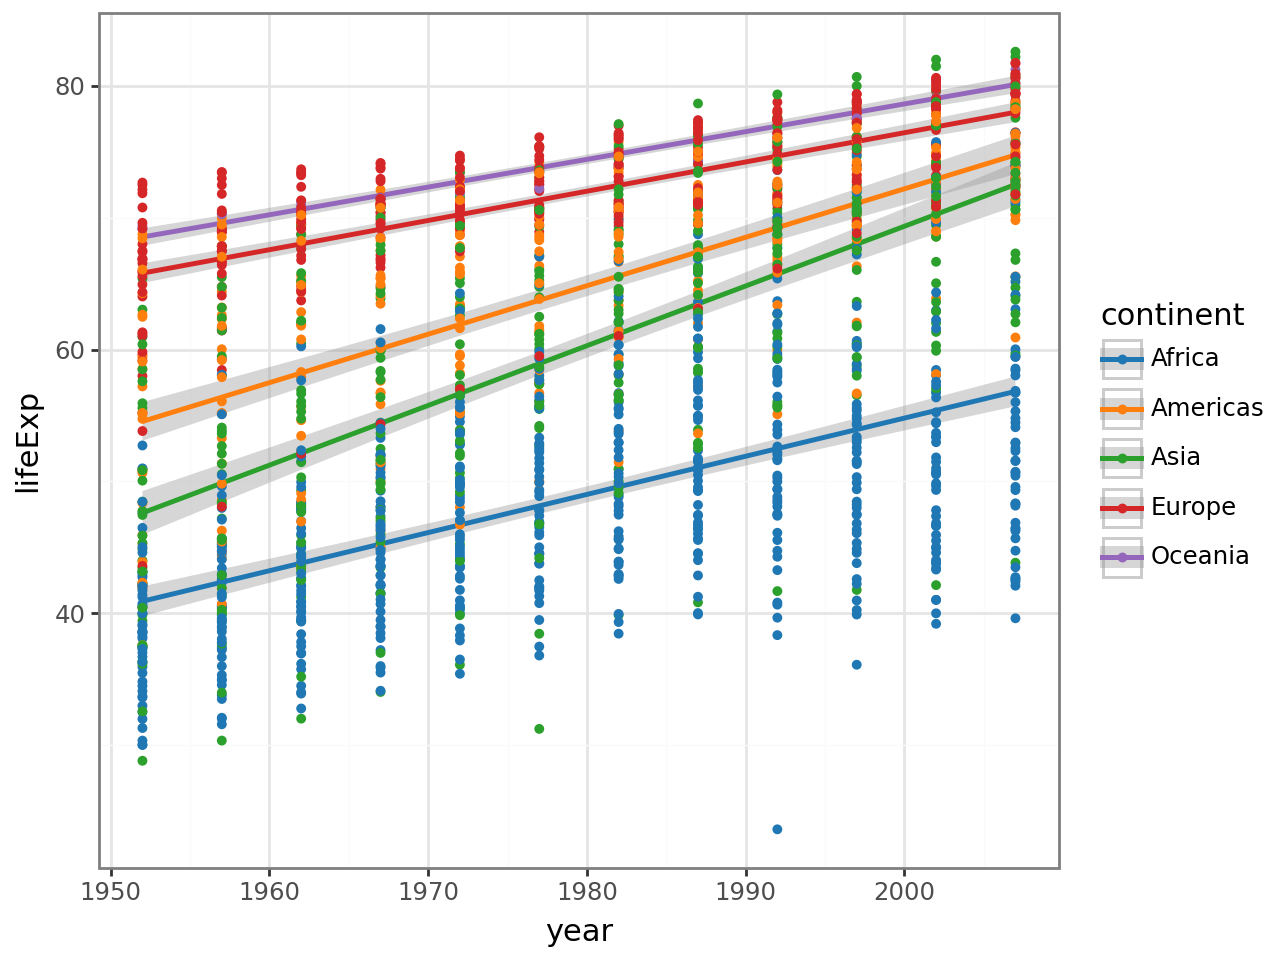

In [103]:
from plotnine import ggplot, aes, geom_point, theme_bw, stat_smooth, scale_color_manual

color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

(ggplot(data=data) +
 aes(x='year', y='lifeExp', color='continent') +
 stat_smooth(method="lm", se=True, span=0.2) +
 geom_point(size=1) + 
 scale_color_manual(values=color_palette) + 
 theme_bw())

In [48]:
# Question 10 

# Given the uniform increase in life expectancy observed across all continents over time 
# and the absence of notable disparities in trends between them, there's not much of a reason to include 
# an interaction term for continent and year in the regression model. A simpler model without this 
# interaction term offers easier interpretation especially if the dataset isn't notably large.

In [104]:
import statsmodels.api as sm

# fitting the linear regression model with an interaction term for continent and year
model = sm.OLS.from_formula('lifeExp ~ year + continent + year:continent', data=data).fit()

# printing the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:51:41   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
pip install seaborn